# Task A_Wavelet_Filter

In [8]:
from skimage.restoration import (denoise_wavelet, estimate_sigma)
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim
import os
import skimage.io


#Adjust figure sizes 
rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# Wavelet Filter

In [23]:
def Wavelet_filter(noisy_im_dir, org_im_dir, img_to_print):
    lst_img_name = []
    lst_mse_noisy = []
    lst_mse_bayes = []
    lst_mse_visus1 = []
    lst_mse_visus2 = []

    lst_ssim_noisy = []
    lst_ssim_bayes = []
    lst_ssim_visus1 = []
    lst_ssim_visus2 = []
    for e, i in enumerate(os.listdir(noisy_im_dir)):
        img_name = i.split(".")[0]+".png"
        lst_img_name.append(img_name)

        noisy_img = cv2.cvtColor(cv2.imread(os.path.join(noisy_im_dir, img_name)), cv2.COLOR_BGR2RGB)    # Noisy Images
        noisy_img = skimage.img_as_float(noisy_img)

        org_img   = cv2.cvtColor(cv2.imread(os.path.join(org_im_dir, img_name)),  cv2.COLOR_BGR2RGB)     # Original Images
        org_img   = skimage.img_as_float(org_img)

        # Average noise standard deviation
        sigma_sd = estimate_sigma(noisy_img, average_sigmas = True, multichannel = True)

        #----------------------------------------------------------------------------------
        # Apply Filters
        #----------------------------------------------------------------------------------    

        # Haar wavelet with BayesShrink method  
        im_bayes = denoise_wavelet(noisy_img, multichannel = True, wavelet='Haar', method='BayesShrink',  \
                                convert2ycbcr=True, mode='soft', rescale_sigma=True, wavelet_levels=3)

        # Haar wavelet with VisuShrink method sigma east/2 
        im_visus1 = denoise_wavelet(noisy_img, multichannel = True, wavelet='Haar', method='VisuShrink', \
                                convert2ycbcr=True, sigma=sigma_sd/2, mode='soft', rescale_sigma=True, wavelet_levels=3)

        #-----------------------------------------------------------------------------------
        # Mean Squared Error between Original image and filtered images
        #-----------------------------------------------------------------------------------

        org_img   = (org_img*255).astype('uint8')
        noisy_img = (noisy_img*255).astype('uint8')
        im_bayes  = (im_bayes*255).astype('uint8')
        im_visus1 = (im_visus1*255).astype('uint8')

        mse_noisy  = np.mean((org_img - noisy_img)**2)
        lst_mse_noisy.append(mse_noisy)
        
        mse_bayes  = np.mean((org_img - im_bayes)**2)
        lst_mse_bayes.append(mse_bayes)
        
        mse_visus1 = np.mean((org_img - im_visus1)**2)
        lst_mse_visus1.append(mse_visus1)
        

        #------------------------------------------------------------------------------------
        # Structured Similarity Index with Original image and filtered images
        #------------------------------------------------------------------------------------

        ssim_noisy = ssim(org_img, noisy_img, multichannel=True, data_range=noisy_img.max() - noisy_img.min())
        ssim_bayes = ssim(org_img, im_bayes, multichannel=True, data_range=im_bayes.max() - im_bayes.min())
        ssim_visus1 = ssim(org_img, im_visus1, multichannel=True, data_range=im_visus1.max() - im_visus1.min())
        
        lst_ssim_noisy.append(ssim_noisy)
        lst_ssim_bayes.append(ssim_bayes)
        lst_ssim_visus1.append(ssim_visus1)

        if e==img_to_print:    
            #----------------------------------------------------------------------------------
            # Display images
            #----------------------------------------------------------------------------------
            rcParams['figure.figsize'] = [12, 8]
            plt.rcParams['figure.dpi'] = 100 
            
            plt.subplot(131), plt.imshow(noisy_img)
            plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_noisy:.2f}, SSIM: {ssim_noisy:.2f}')
            plt.subplot(132), plt.imshow(im_bayes)
            plt.title('BayesShrink'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_bayes:.2f}, SSIM: {ssim_bayes:.2f}')
            plt.subplot(133), plt.imshow(im_visus1)
            plt.title('VisuShrink_sigma_1'), plt.xticks([]), plt.yticks([])
            plt.xlabel(f'MSE: {mse_visus1:.2f}, SSIM: {ssim_visus1:.2f}')
            plt.show()
            
    #------------------------------------
    # Plots
    #------------------------------------
    #Adjust figure sizes
    rcParams['figure.figsize'] = [10, 4]
    plt.rcParams['figure.dpi'] = 100
    X_axis = np.arange(len(lst_img_name))
    X_axis1 = X_axis
    X_axis2 = X_axis + 0.2
    X_axis3 = X_axis+0.2*2

    
    #------------------------------------------------------------
    # Plot Mean Squared Error for each image
    #------------------------------------------------------------
    plt.bar(X_axis1, lst_mse_noisy, 0.2, label='Noisy Imgs')
    plt.bar(X_axis2, lst_mse_bayes, 0.2, label='HAAR_bayes')
    plt.bar(X_axis3, lst_mse_visus1, 0.2, label='HAAR_visus1')

    plt.xlabel('Image Number')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error')
    plt.legend()
    plt.show()

    #------------------------------------------------------------
    # Plot Structued Similarity Index for each image
    #------------------------------------------------------------
    plt.bar(X_axis1, lst_ssim_noisy, 0.2, label='Noisy Imgs')
    plt.bar(X_axis2, lst_ssim_bayes, 0.2, label='HAAR_bayes')
    plt.bar(X_axis3, lst_ssim_visus1, 0.2, label='HAAR_visus1')

    plt.xlabel('Image Number')
    plt.ylabel('SSIM')
    plt.title('Structued Similarity Index')
    plt.legend()
    plt.show()   
    

## Noisy10_ Images - Wavelet Filter

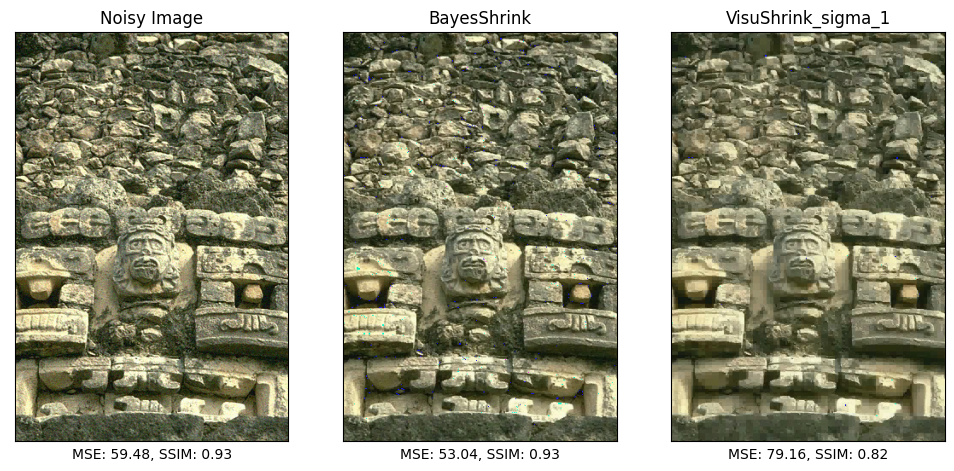

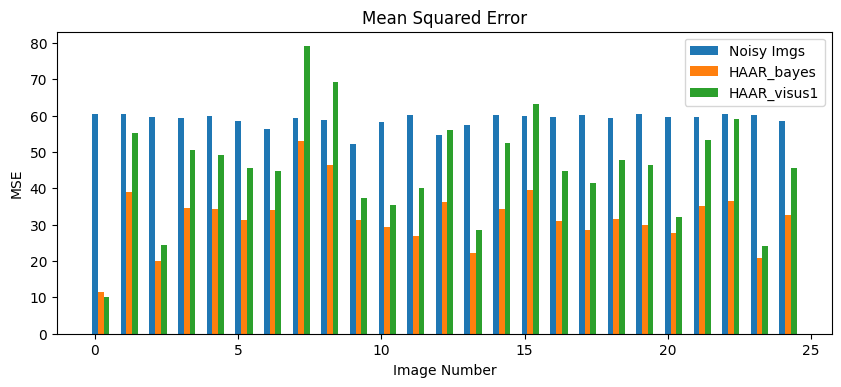

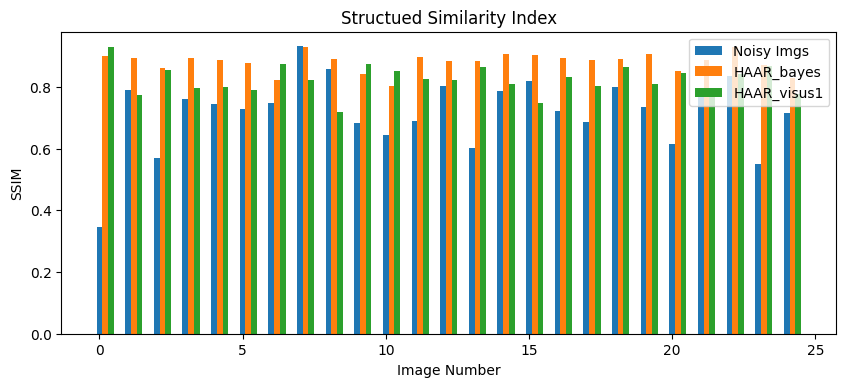

In [22]:
#Access image datasets
noisy10_im_dir = 'Task-A-Dataset-denoising\\noisy10'
org_im_dir = 'Task-A-Dataset-denoising\\original'
img_to_print = 7

Wavelet_filter(noisy10_im_dir, org_im_dir, img_to_print)

## Noisy25_ Images - Wavelet Filter

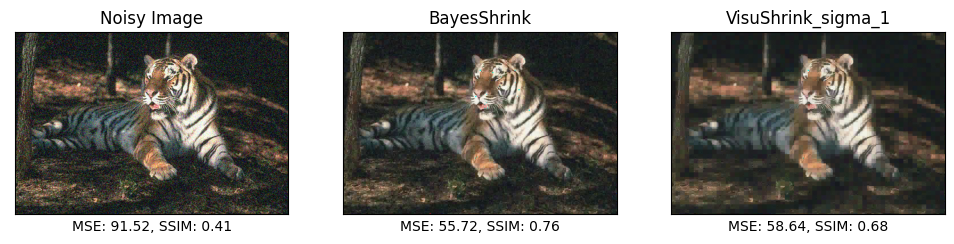

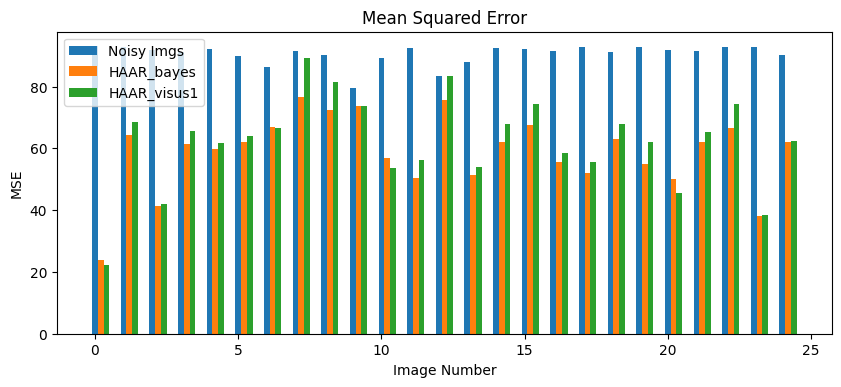

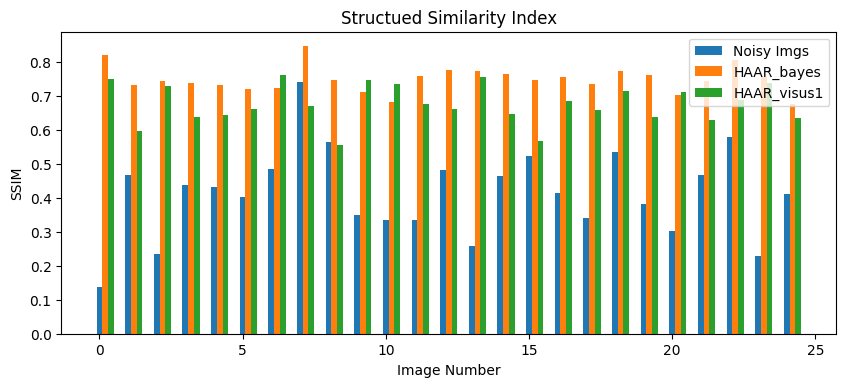

In [21]:
#Access image datasets
noisy25_im_dir = 'Task-A-Dataset-denoising\\noisy25'
org_im_dir = 'Task-A-Dataset-denoising\\original'
img_to_print = 16

Wavelet_filter(noisy25_im_dir, org_im_dir, img_to_print)

## Noisy50_ Images - Wavelet Filter

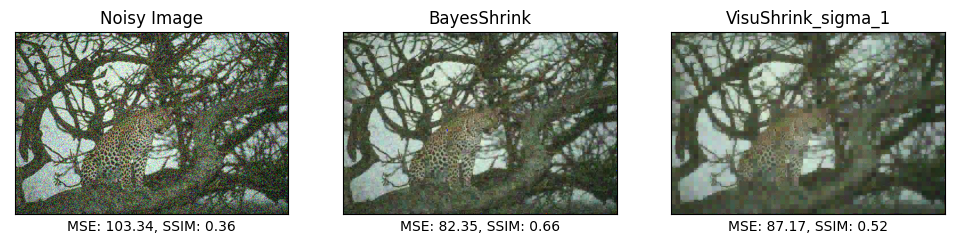

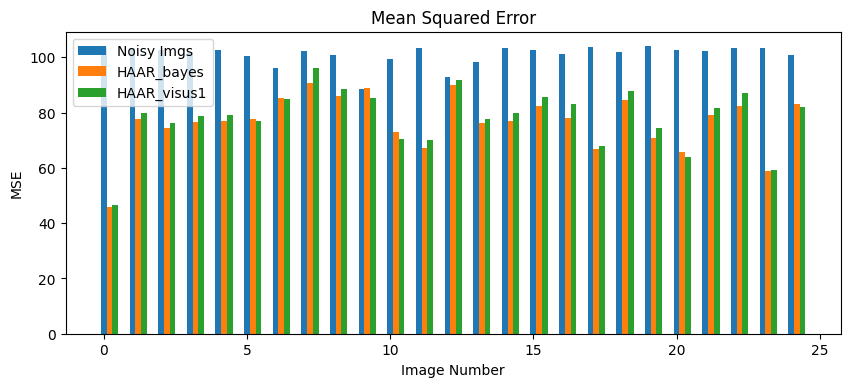

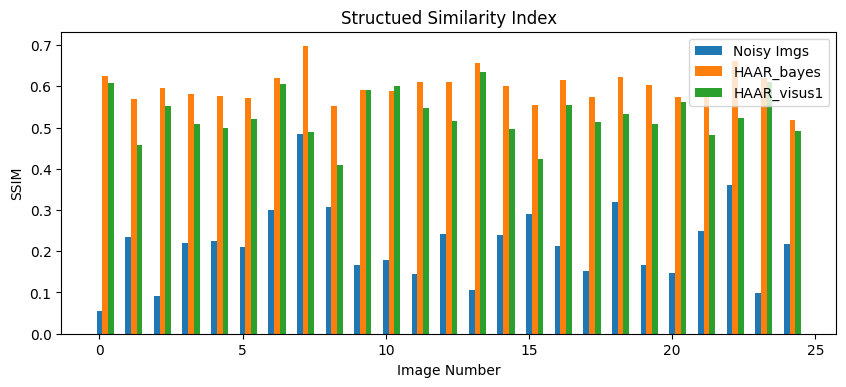

In [20]:
#Access image datasets
noisy50_im_dir = 'Task-A-Dataset-denoising\\noisy50'
org_im_dir = 'Task-A-Dataset-denoising\\original'
img_to_print = 22

Wavelet_filter(noisy50_im_dir, org_im_dir, img_to_print)                                                              